/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:78: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:79: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Mean pixel intensity = 897.579006518
Min pixel intensity = 0
Max pixel intensity = 9418


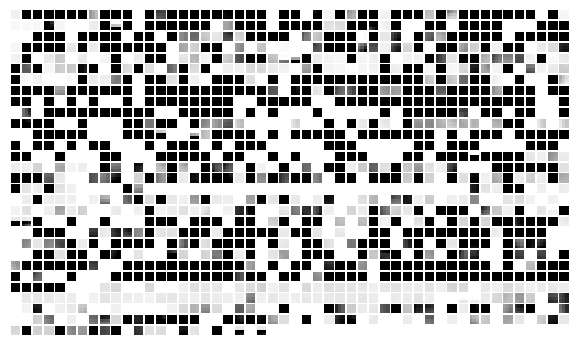

In [13]:
# Script to extract pixel intensities relative to centroid coordinates
# created: 9 August 2018
# revised: 4 September 2018
# original code in pixel_heatmaps.py
#
# REQUIRES:
# specify a directory of images
# specify centroid file ('_FISH-QUANT_all_spots_yymmdd.csv') from a FQ bash run
# specify the data channel
#
# TO DO:
# Install arg parse
#    > arguments = centroid file, ch, image dir

import os
from skimage import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

# specify image directory
image_dir ='/Users/joshtitlow/Desktop/airyscan_smFISH_data/20180910_SypeGFP_rRNA_msp_smFISH_stim/aligned/'

# specify data channel
data_ch = 0 # specify the correct data channel

# specify the FQ centroid file
FQ_file = '/Users/joshtitlow/Desktop/airyscan_smFISH_data/20180910_SypeGFP_rRNA_msp_smFISH_stim/aligned/smFISH_channel/_batch/_FISH-QUANT__all_spots_180913.txt'

# read the FQ file from the metadata header to get pixel size
px_size = pd.read_csv(FQ_file, sep='\t', header=6, nrows=2)
px_xy = px_size['Pix-XY'].iloc[0]
px_z = px_size['Pix-Z'].iloc[0]

# read the FQ file from the data header to get centroid positions
centroid_file = pd.read_csv(FQ_file, sep='\t', header=13)

# convert spatial dimensions to pixel dimensions
centroid_file['X_pix'] = np.ceil(centroid_file['Pos_X'].div(float(px_xy)))
centroid_file['Y_pix'] = np.ceil(centroid_file['Pos_Y'].div(float(px_xy)))
centroid_file['Z_pix'] = np.ceil(centroid_file['Pos_Z'].div(float(px_z)))

# create lists to store pixel intensity values
mean_pixels = []
min_pixels = []
max_pixels = []

# setup a figure
fig = plt.figure(figsize = (10,10))

# start counting so the plt
n = 1

# index rows in the FQ.csv file to get file names and pixel coordinates
for index, row in centroid_file.iterrows():

    # get file name from File column
    image  = row['File']

    # open the image using sci kit image
    im = io.imread(image_dir+image.replace('-1.tif', '.tif'))
    #print image.replace('-1.tif', '.tif'), im.shape 
    
    # store pixel coordinates (3x3 matrix surrounding the centroid) as variables
    Y = row['Y_pix']
    X = row['X_pix']
    Z = np.absolute(row['Z_pix']-1)
    x0 = row['X_pix'] - 1
    x1 = row['X_pix']
    x2 = row['X_pix'] + 1
    y0 = row['Y_pix'] - 1
    y1 = row['Y_pix']
    y2 = row['Y_pix'] + 1
    
    # generate a list of pixel values in the matrix
    matrix_pixels = (im[data_ch,Z,x0,y0],im[data_ch,Z,x1,y0],im[data_ch,Z,x2,y0],im[data_ch,Z,x0,y1],im[data_ch,Z,x1,y1],
                     im[data_ch,Z,x2,y1],im[data_ch,Z,x0,y2],im[data_ch,Z,x1,y2],im[data_ch,Z,x2,y2])
    
    # load pixel values into a numpy array and create a matrix
    matrix = np.array(matrix_pixels)
    data = matrix.reshape((3, 3))

    # setup a figure (for single plots)
    #fig = plt.figure(figsize = (1,0.5)) # this line is outside the loop for this script

    # define subplot in that figure
    #ax = fig.add_subplot(121) # numbers equal position of plot within the figure
    ax = fig.add_subplot(50,50,n) # numbers equal position of plot within the figure

    # modify the plot
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # define heatmap settings
    heatmap = ax.pcolor(data, cmap=plt.cm.Greys, vmin=0, vmax=461)
    heatmap.set_label('pixel intensity')

    # plot heatmap
    #plt.colorbar(heatmap)

    # calculate some descriptive statistics on the intensity of pixels surrounding the centroid
    pixelmean = np.mean(matrix_pixels)
    pixelmin = np.min(matrix_pixels)
    pixelmax = np.max(matrix_pixels)

    # add pixel statistics to a list
    mean_pixels.append(pixelmean)
    min_pixels.append(pixelmin)
    max_pixels.append(pixelmax)

    # iterate
    n+=1

# calculate some basic stastistics about pixel intensity from the whole dataset
meanpixel=np.mean(mean_pixels)
minpixel=np.min(min_pixels)
maxpixel=np.max(max_pixels)

# print basic statistics from the whole dataset
print "Mean pixel intensity =", meanpixel
print "Min pixel intensity =", minpixel
print "Max pixel intensity =", maxpixel

# write basic statistics to centroid file
centroid_file['mean_pix'] = mean_pixels

#centroid_file = pd.DataFrame(mean_pixels, columns=["column"])
centroid_file.to_csv('test_list.csv', index=False)

# plot figure and save
plt.savefig('test_matrix.png')
plt.show(fig)


In [44]:
import pandas as pd
df = pd.DataFrame([["2014", "q1"], ["2015", "q3"]], columns=('Year', 'Quarter'))
df["period"]=str('https://omero1.bioch.ox.ac.uk/figure/file/')+(df["Year"])
df

,Year,Quarter,period
0,2014,q1,https://omero1.bioch.ox.ac.uk/figure/file/2014
1,2015,q3,https://omero1.bioch.ox.ac.uk/figure/file/2015


In [10]:
import os
from skimage import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

fig = plt.figure(figsize = (10,10))
    
    # define subplot in that figure
    #ax = fig.add_subplot(121) # numbers equal position of plot within the figure
    ax = fig.add_subplot(50,50,n) # numbers equal position of plot within the figure

    # modify the plot
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
plt.show(fig)

(4, 6, 956, 956)


In [31]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(amplitude, bins=np.arange(min(amplitude), max(amplitude) + 20, 20)) # bin sizes

xpos = centroid_file['Pos_X']
ypos = centroid_file['Pos_Y']
zpos = centroid_file['Pos_Z']

array = xpos, ypos, zpos})

#plt.hist(amplitude)
plt.ylabel('number of spots')
plt.xlabel('spot amplitude (gray values)')
plt.show()

NameError: name 'amplitude' is not defined

In [90]:
import pandas as pd
import numpy as np
from scipy import spatial

# specify the FQ centroid file
reference_file = '/Users/joshtitlow/Desktop/airyscan_smFISH_data/20180910_SypeGFP_rRNA_msp_smFISH_stim/aligned/smFISH_channel/_batch/_FISH-QUANT__all_spots_180913.txt'
target_file = '/Users/joshtitlow/Desktop/airyscan_smFISH_data/20180903_smFISH/aligned/smFISH_ch/_batch/_FISH-QUANT__all_spots_180904.txt'

# read the FQ files from the data header to get centroid positions
ref_file = pd.read_csv(reference_file, sep='\t', header=13)
targ_file = pd.read_csv(target_file, sep='\t', header=13)

number = 4
ref_amp = ref_file['AMP'].iloc[number]
print ref_amp
#ref_amp = row[AMP]
#target_amp = targetdf[index]

90.0148


In [17]:
import pandas as pd
import numpy as np
from scipy import spatial
import argparse
import sys


def main(argList):
    
    parser= argparse.ArgumentParser()
    
    # specify the FQ centroid files and co-detection distance threshold in nm
    parser.add_argument('-ref_file', help='FQ_spots file for reference channel')
    parser.add_argument('-target_file', help='FQ_spots file for co-detection')
    parser.add_argument('-threshold', help='distance to calculate nearest neighbor')
        
    args= parser.parse_args(args=argList)
    
    # specify the FQ centroid files
    #reference_file = '/Users/joshtitlow/Desktop/airyscan_smFISH_data/20180910_SypeGFP_rRNA_msp_smFISH_stim/aligned/smFISH_channel/_batch/_FISH-QUANT__all_spots_180913_test1.txt'
    #target_file = '/Users/joshtitlow/Desktop/airyscan_smFISH_data/20180910_SypeGFP_rRNA_msp_smFISH_stim/aligned/smFISH_channel/_batch/_FISH-QUANT__all_spots_180913_test2.txt'

    # read the FQ files from the data header to get centroid positions
    ref_file = pd.read_csv(args.ref_file, sep='\t', header=13)
    targ_file = pd.read_csv(args.target_file, sep='\t', header=13)

    xpos_ref = ref_file['Pos_X']
    ypos_ref = ref_file['Pos_Y']
    zpos_ref = ref_file['Pos_Z']

    xpos_targ = targ_file['Pos_X']
    ypos_targ = targ_file['Pos_Y']
    zpos_targ = targ_file['Pos_Z']

    # convert data into an numpy array
    target_df = np.column_stack((xpos_targ,ypos_targ,zpos_targ))

    # create list to store amplitude of co-detected spot, ref/targ ratio, and target distance
    targ_amp = []
    targ_dist = []
    
    for index, row in ref_file.iterrows():

        # get 3D position from X,Y,Z position columns
        pt  = row['Pos_X'], row['Pos_Y'], row['Pos_Z']

        # find nearest neighbor and calculate distance
        distance,index = spatial.KDTree(target_df).query(pt)

        # add nearest neighbor amp and dist to a list
        targ_amp.append(targ_file['AMP'].iloc[index])
        targ_dist.append(distance)

    # add lists to ref_file
    ref_file['target_amp'] = targ_amp
    ref_file['r_t_ratio'] = ref_file['AMP'].div(float(target_amp))
    ref_file['targ_dist'] = targ_dist

    # calculate co-detection percentage
    codetect = 100 * (len(ref_file[ref_file.targ_dist > args.threshold])) / (float(len(ref_file.index)))
    print "Co-detection =", codetect,"%"

    # write ref_file to csv
    ref_file.to_csv('test_list.csv', index=False)

if __name__=='__main__':
    main(sys.argv[1:])

In [ ]:
import subprocess
import sys
import os
import pandas as pd

#indir, outname  = sys.argv[1:]
indir = "/Users/joshtitlow/Clutter_20181109/2color_smFISH/aligned/smFISH_reference_ch1/"
infiles = os.listdir(indir)

d = {}

for i in infiles:
        if not i.startswith('.'):   
          thisfile = os.path.join(os.getcwd(), indir, i)
          print thisfile
          with open(thisfile, 'rb') as f:
                  p = pickle.load(f)
                  print('thispickle', p)
  #       with open(os.path.join(os.getcwd(), indir, i), 'r') as f:
          #p = pickle.load(f)
                  d[i.rstrip('.pickle')] = p

#print(d)
df = pd.DataFrame.from_dict(d, orient =  'index')
df.to_csv('%s.csv' % outname)
print(df)

In [27]:
import subprocess
import sys
import os
import pandas as pd

#indir, outname  = sys.argv[1:]
ch1_indir = "/Users/joshtitlow/Clutter_20181109/2color_smFISH/aligned/smFISH_reference_ch1/"
ch2_indir = "/Users/joshtitlow/Clutter_20181109/2color_smFISH/aligned/smFISH_target_ch2/"
ch1_infiles = os.listdir(ch1_indir)
ch2_infiles = os.listdir(ch2_indir)

d = {}
co_detection = {}
ch1_spots = {}
ch2_spots = {}

for i in ch1_infiles:
    if "1__spots.txt" in i:
        print 'Ch1 =',i
for i in ch2_infiles:
    if "1__spots.txt" in i:
        print 'Ch2 =',i

df = pd.DataFrame.from_dict(d, orient =  'index')
df.to_csv('%s.csv' % outname)
print(df)

Ch1 = 20180105_CS_msp670_570_HRP488_DAPI_p3s3l_TRACHEA_.ome_ALN.ome-1__spots.txt
Ch1 = 20180105_CS_msp670_570_HRP488_DAPI_p2s4l.ome_ALN.ome-1__spots.txt
Ch1 = 20180105_CS_msp670_570_HRP488_DAPI_p2s3l.ome_ALN.ome-1__spots.txt
Ch1 = 20180105_CS_msp670_570_HRP488_DAPI_p1s3l.ome_ALN.ome-1__spots.txt
Ch1 = 20180105_CS_msp670_570_HRP488_DAPI_p2s5l.ome_ALN.ome-1__spots.txt
Ch1 = 20180105_CS_msp670_570_HRP488_DAPI_p2s5r_GOOD.ome_ALN.ome-1__spots.txt
Ch2 = 20180105_CS_msp670_570_HRP488_DAPI_p3s3l_TRACHEA_.ome_ALN.ome-1__spots.txt
Ch2 = 20180105_CS_msp670_570_HRP488_DAPI_p2s4l.ome_ALN.ome-1__spots.txt
Ch2 = 20180105_CS_msp670_570_HRP488_DAPI_p2s3l.ome_ALN.ome-1__spots.txt
Ch2 = 20180105_CS_msp670_570_HRP488_DAPI_p1s3l.ome_ALN.ome-1__spots.txt
Ch2 = 20180105_CS_msp670_570_HRP488_DAPI_p2s5l.ome_ALN.ome-1__spots.txt
Ch2 = 20180105_CS_msp670_570_HRP488_DAPI_p2s5r_GOOD.ome_ALN.ome-1__spots.txt


In [73]:
thresh = 10000
#codetect = 100 * (len(ref_file[ref_file.targ_dist > 10000])) / (float(len(ref_file.index)))
codetect = 100 * (len(ref_file[ref_file.targ_dist > thresh])) / (float(len(ref_file.index)))

print "Co-detection =", codetect,"%"

Co-detection = 28.0 %


In [29]:
import pandas as pd

reference_file = '/Users/joshtitlow/Desktop/2color_smFISH/aligned/smFISH_reference_ch1/20180105_CS_msp670_570_HRP488_DAPI_p2s3l.ome_ALN.ome-1__spots.txt'
#target_file = '/Users/joshtitlow/Desktop/airyscan_smFISH_data/20180910_SypeGFP_rRNA_msp_smFISH_stim/aligned/smFISH_channel/_batch/_FISH-QUANT__all_spots_180913_test2.txt'

    
ref_file = pd.read_csv(reference_file, sep='\t', header=18)
ref_file = ref_file[:-1]
#ref_file[ref_file.Pos_Y != 'SPOTS_END']
len(ref_file)
print(ref_file.loc[1267])

Pos_Y              70622.9
Pos_X              36257.4
Pos_Z              4330.94
AMP                5554.55
BGD                4320.26
RES            2.01008e+07
SigmaX             125.557
SigmaY             125.557
SigmaZ              421.44
Cent_Y             280.601
Cent_X             274.183
Cent_Z             614.843
MuY                288.867
MuX                256.351
MuZ                730.938
ITERY_det               10
Y_det                  509
X_det                  262
Z_det                   22
Y_min                  507
Y_max                  511
X_min                  260
X_max                  264
Z_min                   19
Z_max                   25
INT_raw               9691
INT_filt              2149
SC_det             466.917
SC_det_norm      0.0570487
TH_det                   1
TH_fit                   1
Name: 1267, dtype: object


In [31]:
import argparse
import sys

co_det_thresh = args.threshold
print co_det_thresh

def main(argList):
    
    parser= argparse.ArgumentParser()
    parser.add_argument('-ref_file', help='FQ_spots file for reference channel')
    parser.add_argument('-target_file', help='FQ_spots file for co-detection')
    parser.add_argument('-threshold', help='distance to calculate nearest neighbor')
        
    args= parser.parse_args(args=argList)

if __name__=='__main__':
    main(sys.argv[1:])

8

In [ ]:
from scipy import spatial
import numpy as np
x = centroid_file['AMP']


In [101]:
pixelmean = np.mean([im[data_ch,Z,x0,y0]])


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [92]:
FQ_file = '/Users/joshtitlow/Desktop/airyscan_smFISH_data/aligned/smFISH_ch/_batch/_FISH-QUANT__all_spots_180904c.txt'
centroid_file = pd.read_csv(FQ_file, sep='\t', header=13)
px_size = pd.read_csv(FQ_file, sep='\t', header=6)
px_xy = px_size['Pix-XY'].iloc[0]
px_xy

'40'

In [206]:
MBtemplate = open ('/Users/joshtitlow/Desktop/DavidGUI/json_Figure/template_json_mb.txt', 'r')
linesMB = MBtemplate.readlines()
#print(len(lines))
m = linesMB[0]

with open('json_data.txt', 'w+b') as filehandle:
        filehandle.write(m)
        filehandle.head()

AttributeError: 'file' object has no attribute 'head'

In [175]:
import json
import os
import sys
from pprint import pprint
def main():
    figure_json = None
    #with open(figure_fpath, 'r') as fh:
    #   figure_json = json.load(fh)
    figure_json = jsonfile
    ## This file id should be the file annotation id.  It shouldn't
    ## exist yet because we're import a new one.  The only reason to
    ## exist is if we were updating an existing figure but we aren't
    ## right?
    for key in figure_json.items():
        if 'fileId' in figure_json:
            raise RuntimeError('this figure refers an already existing annotation')
        else: 
            print 'it worked!'  
        
    name = figure_json['figureName']
    ## description of file annotations that were created via the
    ## OMERO.figure plugin also include the image ID of the first
    ## image on the description.  Don't see the point of that so I'm
    ## not doing it.
    description = {'name': name}

    ## Figures created via the OMERO.figure plugin have a fileId
    ## attribute with the file annotation id.  I think we can get away
    ## without it.
    #file_ann = conn.createFileAnnfromLocalFile(figure_fpath,
    #    origFilePathAndName=name, mimetype='application/json',
    #    ns='omero.web.figure.json', desc=description)

MBtemplate = open ('/Users/joshtitlow/Desktop/DavidGUI/json_Figure/template_json_mb.txt', 'r')
linesMB = MBtemplate.readlines()
#print(len(lines))
m = linesMB[0]

with open('jsonfile', 'w') as filehandle:
    jsonfile = json.dumps(m, filehandle)
    #pprint(jsonfile)
#main()

In [199]:
MBtemplate = open ('/Users/joshtitlow/Desktop/DavidGUI/json_Figure/template_json_mb.txt', 'r')
linesMB = MBtemplate.readlines()
#print(len(lines))
m = linesMB[0]

#with open('/Users/joshtitlow/Desktop/DavidGUI/json_Figure/template_json_mb.txt') as f:
json_data = json.loads(m)

for key, value in json_data.items():
    if json_data.has_key('fileId'):
        raise RuntimeError('this figure refers an already existing annotation')
    else: 
        print 'it worked!'  

RuntimeError: this figure refers an already existing annotation

In [187]:
MBtemplate = json.loads(/Users/joshtitlow/Desktop/DavidGUI/json_Figure/template_json_mb.txt)
for key, value in MBtemplate.items():
    
#linesMB = MBtemplate.readlines()
#print(len(lines))
#m = linesMB[0]
#with open('jsonfile.txt', 'w') as filehandle:
#    json.dumps(MBtemplate, filehandle)
#    jfile = json.loads(MBtemplate)

ValueError: No JSON object could be decoded

In [125]:
# Script to analyse single pixel intensities relative to centroids
# Created: 2 August 2018

# Worflow overview
# > Acquire super resolution data of smFISH and a correlated signal (e.g., IHC or in this case another smFISH target)
# > Perform registration with Chromagnon
# > Use FISH-Quant to generate a .csv file of centroid positions from smFISH signal (Batch>SaveThresolded spots)
#     > Convert the position coordinates to integer pixel values (used Excel but could write this with Python) 
# > Generate a single channel z-stack of the signal to be correlated with centroid positions
# > Run this script which does the following:
#     > Open a .csv of centroid positions (have to check if 'raw' FQ output files can be analysed, was an issue with 
#       where series of integers had to be added to the lefthand column)
#     > Iterate through each row and get the image file name from the File_name column
#     > Use scikit-image to open the .tiff as a 3D numpy array
#     > Pass the pixel values as variables to scikit-image object to get the intensity value
#
# TO DO
# 
# Fix file_name heading 
# Consider alternative normalisation routines
# Append pixel values to the FQ .csv file (currently the list is printed and copied from the notebook)
# 

import os
from skimage import io
import pandas as pd

image_dir ='/Users/joshtitlow/Desktop/airyscan/images/rRNA_not_normalised/'
image_names = [i for i in os.listdir(image_dir) if i.endswith('.tif')]

centroid_file = pd.read_csv('/Users/joshtitlow/Desktop/airyscan/images/images/_batch/_FISH-QUANT__all_spots_180801.csv', header=13)

for index, row in centroid_file.iterrows():
    file =row['File']
    im = io.imread(image_dir+file)
    #print im.shape
    Y = row['Y_pix'] 
    X = row['X_pix']
    Z1 = row['Z_pixAb']
    Z2 = row['Z_pixBl']
    pixel = im[Z2,Y,X]
    print(pixel)

393
106
131
220
156
256
147
195
117
183
110
185
280
469
398
396
305
824
453
111
357
349
397
452
523
231
250
165
346
504
436
221
460
310
611
225
162
369
171
170
253
100
169
412
252
255
110
309
249
142
307
620
290
498
363
339
168
130
340
350
248
372
330
248
645
312
350
335
477
369
774
413
982
249
246
499
142
271
254
89
373
396
273
153
315
378
483
224
443
264
341
192
595
641
235
160
111
117
218
184
183
141
200
151
76
167
128
76
190
249
228
190
237
145
169
238
193
156
111
184
149
93
228
160
77
147
151
67
106
190
160
78
154
112
162
189
138
81
114
240
90
220
75
233
237
155
175
92
179
74
77
236
180
100
115
165
174
101
88
243
224
154
203
190
237
171
87
94
111
143
183
172
251
182
90
145
147
287
171
220
190
252
238
140
271
107
299
154
139
181
299
213
244
199
104
199
216
223
365
253
84
215
124
138
138
333
257
105
275
120
178
223
178
65
183
69
72
120
81
81
81
138
89
74
145
90
109
84
103
139
110
86
101
131
176
237
169
116
144
229
264
176
88
129
104
230
258
213
229
154
257
154
219
371
89
188
144
220